# Hausaufgabe 5
## Schallerzeugung durch einen umströmten Zylinder (Teil 2)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig Wirbelstraßen aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

### 1) Einlesen der Daten

Zusätzlich zu dem in Hausaufgabe 4 ausgewerteten Messungen wurde die Schallabstrahlung von 9 Zylindern unterschiedlichen Durchmessers bei 13 verschiedenen Strömungsgeschwindigkeiten gemessen und der jeweilige Hiebton bestimmt.
Die Ergebnisse sind in tabellarischer Form in der Datei `vf.csv` eingetragen.


**1.1) Laden Sie die detektierten Hiebtöne aus der Datei `vf.csv`.**

  * Verwenden Sie im Verlauf der gesamten Aufgabe in den Variablen nur [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem#SI-Einheiten). Rechnen Sie ggf. um.
  * *Zusatzaufgabe (freiwillig): Lesen Sie neben den Frequenzen auch die Durchmesser-Werte automatisiert ein, anstelle sie per Hand einzugeben.*
  * Geben Sie aus, wie viele Werte Sie jeweils für Durchmesser `d` und Geschwindigkeit `v` haben. Wie groß ist der kleinste Durchmesser?
  * Geben Sie aus, welche Dimension das Array mit den Frequenzen hat `f` und wie hoch jeweils die kleinste bzw. größte der eingelesenen Frequenzen ist.

In [113]:
# Hier eigenen Code schreiben ...
import pandas as pd
import numpy as np

df = pd.read_csv("vf.csv", header=1)
title_csv = "# Gemessener Hiebton (Frequenz mit maximalem Pegel in Hz)"
df

,# v0 in m/s,d=3mm,d=4mm,d=5mm,d=7mm,d=9mm,d=11mm,d=13mm,d=16mm,d=20mm
0,8.32,543.04,408.10,329.83,234.27,184.14,149.89,125.13,101.42,81.67
1,10.73,702.87,522.33,425.56,297.68,234.59,190.87,163.48,132.67,105.90
2,14.10,914.43,689.08,552.86,400.17,307.89,254.11,215.73,173.16,138.90
3,18.69,1210.97,918.65,740.07,524.51,411.06,337.24,284.78,230.46,185.08
4,22.10,1446.13,1087.37,881.73,622.21,483.80,397.48,336.60,274.14,217.86
5,25.06,1638.99,1231.13,992.45,710.41,548.76,449.56,381.22,308.65,247.42
6,29.76,1962.34,1462.56,1177.07,843.65,651.46,537.05,452.85,367.34,295.30
7,34.00,2236.47,1677.31,1341.23,957.86,745.89,610.97,518.58,420.16,336.71
8,37.25,2447.92,1841.72,1471.93,1055.76,819.18,666.91,566.73,460.14,369.54
9,40.95,2694.82,2026.79,1621.68,1154.95,899.34,736.58,621.65,510.68,405.74


In [114]:
# Geben Sie aus, wie viele Werte Sie jeweils für Durchmesser d und Geschwindigkeit v haben. Wie groß ist der kleinste Durchmesser
d = np.array([int(x.replace("d=", "").replace("mm", ""))  for x in   list(df.columns[1:])])
print(type(d))
print("d: ",d)

#umwandlung in SI-Einheiten
d = d/1000
print(f"d in SI-Units [m]: {d}")


print(f"Anzahl an Durchmessern/Rohren: {d.size}")
# v = df.shape[0]
v = df.to_numpy().T[0]
print(f"v in [m/s]: {v}")
print(f"Anzahl an Geschwindigkeiten: {v.shape[0]}")
# kleinster Durchmesser:
print(f"Kleinster Durchmesser: {d.min()} m")

# Frequencies
f = df.to_numpy().T[1:].T
print("frequencies in [Hz]: ")
print(f)
print(f"Dimension of f: {f.ndim}")
print(f"Shape of f: {f.shape}")
print(f"f.max(): {f.max()} [Hz],\nf.min(): {f.min()} [Hz]")



<class 'numpy.ndarray'>
d:  [ 3  4  5  7  9 11 13 16 20]
d in SI-Units [m]: [0.003 0.004 0.005 0.007 0.009 0.011 0.013 0.016 0.02 ]
Anzahl an Durchmessern/Rohren: 9
v in [m/s]: [ 8.32 10.73 14.1  18.69 22.1  25.06 29.76 34.   37.25 40.95 44.07 45.42
 47.31]
Anzahl an Geschwindigkeiten: 13
Kleinster Durchmesser: 0.003 m
frequencies in [Hz]: 
[[ 543.04  408.1   329.83  234.27  184.14  149.89  125.13  101.42   81.67]
 [ 702.87  522.33  425.56  297.68  234.59  190.87  163.48  132.67  105.9 ]
 [ 914.43  689.08  552.86  400.17  307.89  254.11  215.73  173.16  138.9 ]
 [1210.97  918.65  740.07  524.51  411.06  337.24  284.78  230.46  185.08]
 [1446.13 1087.37  881.73  622.21  483.8   397.48  336.6   274.14  217.86]
 [1638.99 1231.13  992.45  710.41  548.76  449.56  381.22  308.65  247.42]
 [1962.34 1462.56 1177.07  843.65  651.46  537.05  452.85  367.34  295.3 ]
 [2236.47 1677.31 1341.23  957.86  745.89  610.97  518.58  420.16  336.71]
 [2447.92 1841.72 1471.93 1055.76  819.18  666.91  566.73

In [115]:
# Hier sind einige Plausibilitätstests:
assert len(d)==len(v)-4
assert f.size>110
assert f.shape==(len(v),len(d))
assert 1e-3<min(d)<1e-2

**1.2) Visualisieren Sie die Daten für eine bessere Übersicht.**

  * Stellen Sie in Abb. 1 den Verlauf der Frequenzen über der Strömungsgeschwindigkeit für jeden Durchmesser dar.
  * Stellen Sie in Abb. 2 den Verlauf der Frequenzen über dem Zylinderdurchmesser für jede Strömungsgeschwindigkeit dar.  
  * Zeichnen Sie in die Abbildungen 1 und 2 die gefundenen Hiebtöne aus der letzten HA ein und bewerten Sie die Plausibilität. Fügen Sie die HA4-Daten jedoch *nicht* dem Datenarray hinzu.
  * Stellen Sie in Abb. 3 die Abhängigkeit der Frequenz von sowohl der Strömungsgeschwindigkeit als auch des Zylinderdurchmessers dar (z.B. über einen Konturplot)
  * Fügen Sie jeweils eine aussagekräftige Legende bzw. Farbskala hinzu und achten Sie auf korrekte Achsenbeschriftungen.


Old heapsounds:  [ 272.8  351.7  463.   614.7  727.2  825.   980.2 1120.1 1227.6 1349.7
 1452.6 1497.1 1559.2]


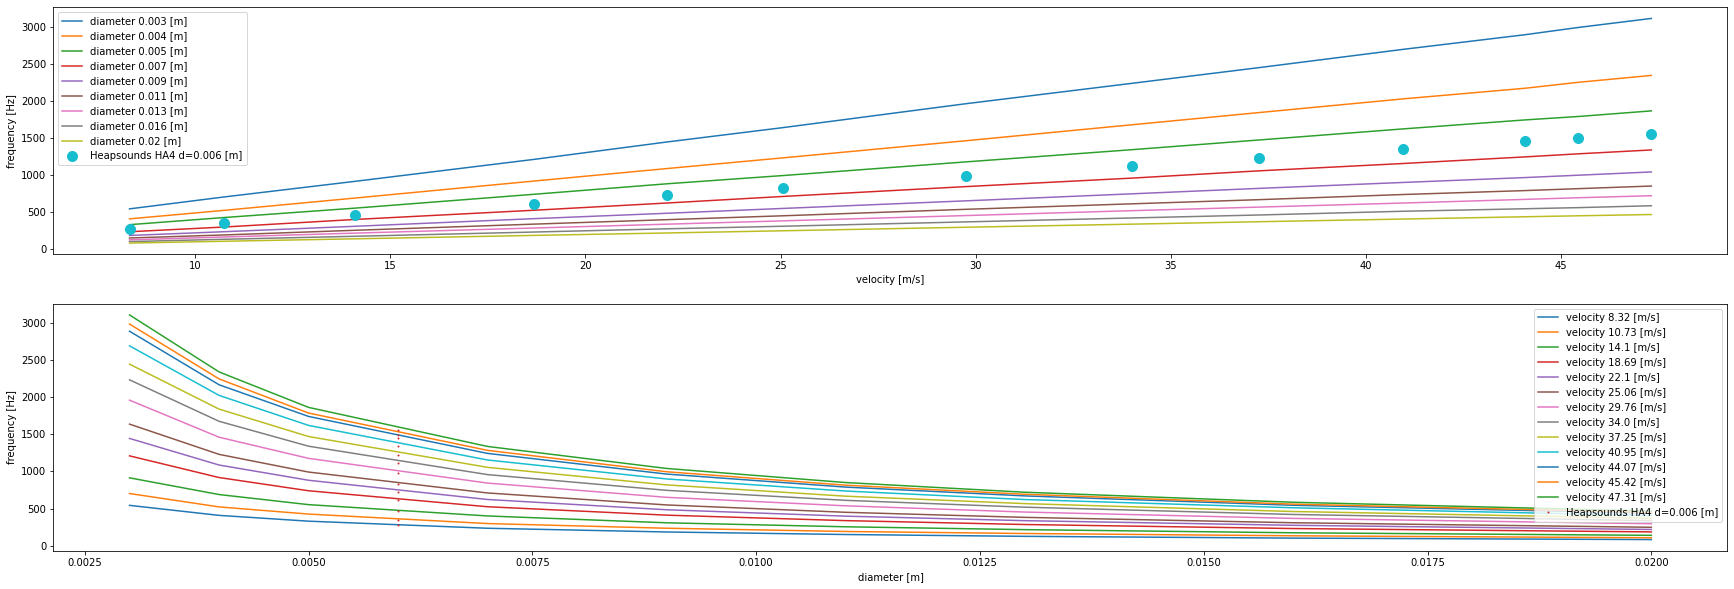

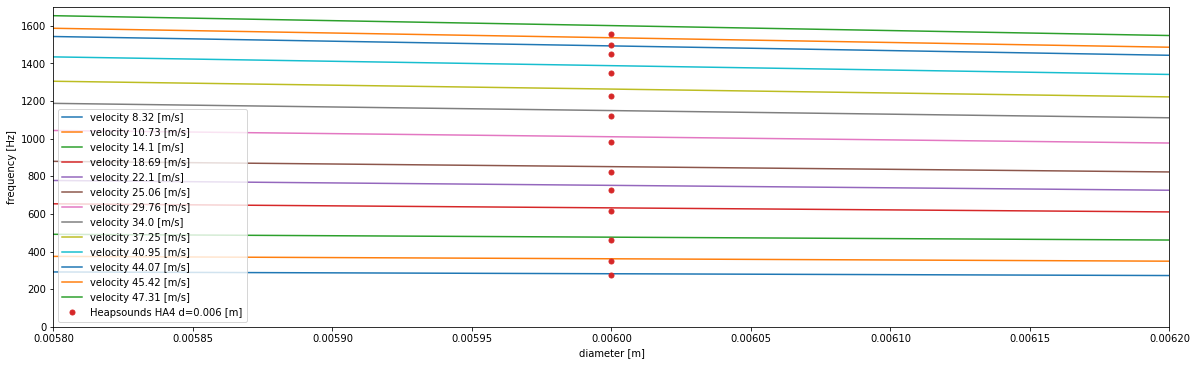

Die Daten wirken plausibel, sie weichen nur gering vom 2. Plot ab und im 1. Plot passen sie sehr gut zwischen die anderen Röhren


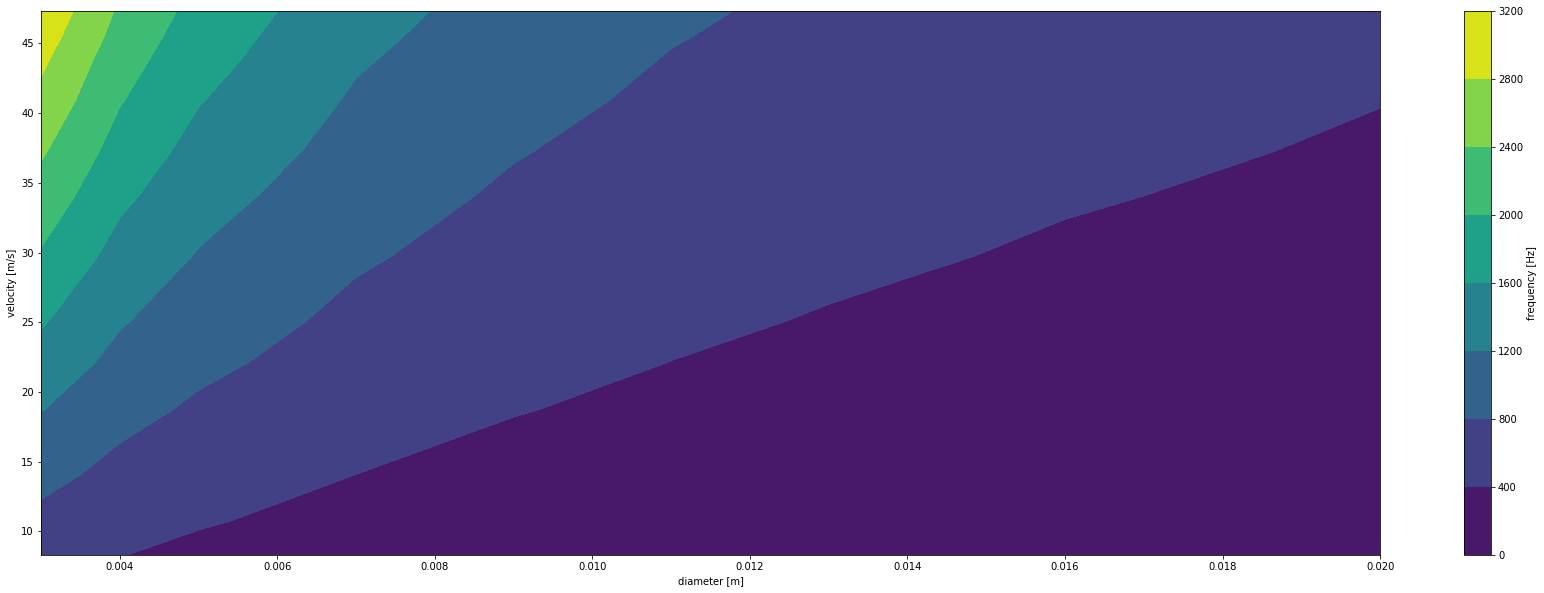

In [116]:
# Hier eigenen Code schreiben ...
import matplotlib.pyplot as plt

#import old heapsounds
old_heaps = pd.read_csv("hiebsounds.csv", index_col=0).to_numpy().T[0]
print("Old heapsounds: ", old_heaps)

fig = plt.figure(1, (30,10))

plt.subplot(211)
plt.ylabel("frequency [Hz]")
plt.xlabel("velocity [m/s]")
for dataset in f.T:
    # print(dataset, "\n\n")
    plt.plot(v, dataset)


plt.plot(v,old_heaps, linestyle="none", marker='o', markersize=10, label="Heapsounds HA4 d=0.006 [m]")

leg = [f"diameter {x} [m]" for x in d]
leg.append("Heapsounds HA4 d=0.006 [m]")
plt.legend(leg)

plt.subplot(212)
plt.xlabel("diameter [m]")
plt.ylabel("frequency [Hz]")
for dataset in f:
    plt.plot(d, dataset)

plt.plot([0.006]*13, old_heaps, linestyle="none", marker='o',
         markersize=1, label="Heapsounds HA4 d=0.006 [m]")

leg2 = [f"velocity {x} [m/s]" for x in v]
leg2.append("Heapsounds HA4 d=0.006 [m]")

plt.legend(leg2)

plt.show()
# Drittes Plot, um es noch anschaulicher zu machen
plt.figure(2, (20,20))
plt.subplot(313)
plt.xlabel("diameter [m]")
plt.ylabel("frequency [Hz]")
plt.xlim([0.0058, 0.0062])
plt.ylim([0,1700])
for dataset in f:
    plt.plot(d, dataset)

plt.plot([0.006]*13, old_heaps, linestyle="none", marker='o',
         markersize=5, label="Heapsounds HA4 d=0.006 [m]")

leg2 = [f"velocity {x} [m/s]" for x in v]
leg2.append("Heapsounds HA4 d=0.006 [m]")

plt.legend(leg2)

plt.show()



print("Die Daten wirken plausibel, sie weichen nur gering vom 2. Plot ab und im 1. Plot passen sie sehr gut zwischen die anderen Röhren")

plt.figure(3, (30,10))
plt.ylabel("velocity [m/s]")
plt.xlabel("diameter [m]")
plt.contourf(d, v, f)
plt.colorbar(label='frequency [Hz]')
plt.show()

### 2) Modellbildung

Die Frequenz des Hiebtons hängt mindestens von den zwei Größen Durchmesser und Geschwindigkeit ab:

$$
f = f(d,v)
$$

Die Abhängigkeit von $v$ (Abb. 1) wurde in HA 4 mittels der Regressionsgerade gefunden. 
Die Abhängigkeit von $d$ (Abb. 2) könnte nach demselben Schema geschehen, allerdings trifft die Annahme einer direkt linearen Abhängigkeit offensichtlich nicht zu.
Außerdem wäre es wünschenswert, beide Parameter einer einzigen Berechnungsformel übergeben zu können.

Im einfachsten Fall mit nur linearen Abhängigkeiten könnten wir schreiben:

$$
f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon
$$

Die Koeffizienten $\beta_n$ erfüllen denselben Zweck wie $a$ und $b$ aus HA 4. 
$\epsilon$ ist eine Störgröße, die als zufällig angenommen wird und die den Fehler beschreibt, den das Modell z.B. durch unbeobachtbare Abhängigkeiten macht.
Die Lösung eines Problems mithilfe einer solchen Formulierung geschieht über die [multiple lineare Regression](https://de.wikipedia.org/wiki/Multiple_lineare_Regression).

Nichtlineare Abhängigkeiten können mit diesem Schema auch untersucht werden, sofern eine Annahme zur Art der Nichtlinearität getroffen wird, z.B.:

$$
f(d,v) = \beta_1\,d + \beta_2\,v + \beta_3\,d^2 + \ldots + \beta_4\,\frac{d}{v} + \beta_5\,\frac{v}{d} + \ldots + \beta_6\,\sin(v^{\sqrt{d}}) + \ldots +  \epsilon
$$

Das Modell kann dabei beliebig komplex werden.
Allgemein können wir auch schreiben:

$$
f = \pmb{x} \cdot \pmb{\beta} + \epsilon~,
$$

wobei der Vektor $\pmb{x}$ die charakteristischen Größen wie $d$, $v$ oder daraus abgeleitete Terme enthält (im maschinellen Lernen wird hier auch von *Features* gesprochen) und $\pmb{\beta}$ die zunächst noch unbekannten Koeffizienten.

Natürlich sollen unsere Messdaten (gekennzeichnet mit Tilde $\tilde{}$) durch das Modell beschreibbar sein, sodass gilt:

$$
\tilde{f}_i = \pmb{x}_i \cdot \pmb{\beta} + \epsilon_i~.
$$
 
Der Index $i$ beschreibt eine konkrete Messung.
Wir können die Vektoren $\pmb{x}_i$ als Zeilen in eine Matrix $\pmb{X}$ schreiben, sodass sich ergibt:

$$
\pmb{\tilde{f}}  = \pmb{X} \cdot \pmb{\beta} + \pmb{\epsilon}~.
$$

In die Form dieser Gleichung wollen wir nun unsere Größen bringen.

**2.1) Erstellen Sie aus den Strömungsgeschwindigkeiten und Zylinderdurchmessern eine Modellmatrix $\pmb{X}$ und aus den zugehörigen Frequenzen den Messvektor $\pmb{\tilde{f}}$.**

  * Für die Generierung von $\pmb{X}$ muss bereits ein Modell angenommen werden. Verwenden Sie zunächst $\tilde{f}_i = \beta_0\cdot 1 + \beta_1\cdot d_i + \beta_2\cdot v_i + \epsilon_i$. Das Modell soll jedoch später leicht ausgetauscht werden können. Hier bietet sich z.B. die Verwendung einer Funktion an, die je eine Zeile von $\pmb{X}$ abhängig von $d$ und $v$ je nach Modell berechnet.
  * Geben Sie die Dimensionen der beiden erstellten Größen aus.
  * Plotten Sie zur Überprüfung die Spalten der Matrix $\pmb{X}$ über $\pmb{\tilde{f}}$. Verwenden Sie die Variablen `X` und `f_tilde`.
 
_Hinweis: Der unbekannte Fehler $\epsilon_i$ ist immer implizit enthalten und muss hier nicht über eine eigene Variable "mitmodelliert" werden._

In [117]:
# print(X)

Dimension von X: 2
Shape of X: (117, 3)
Dimension of f_tilde: 1
Shape of f_tilde: (117,)


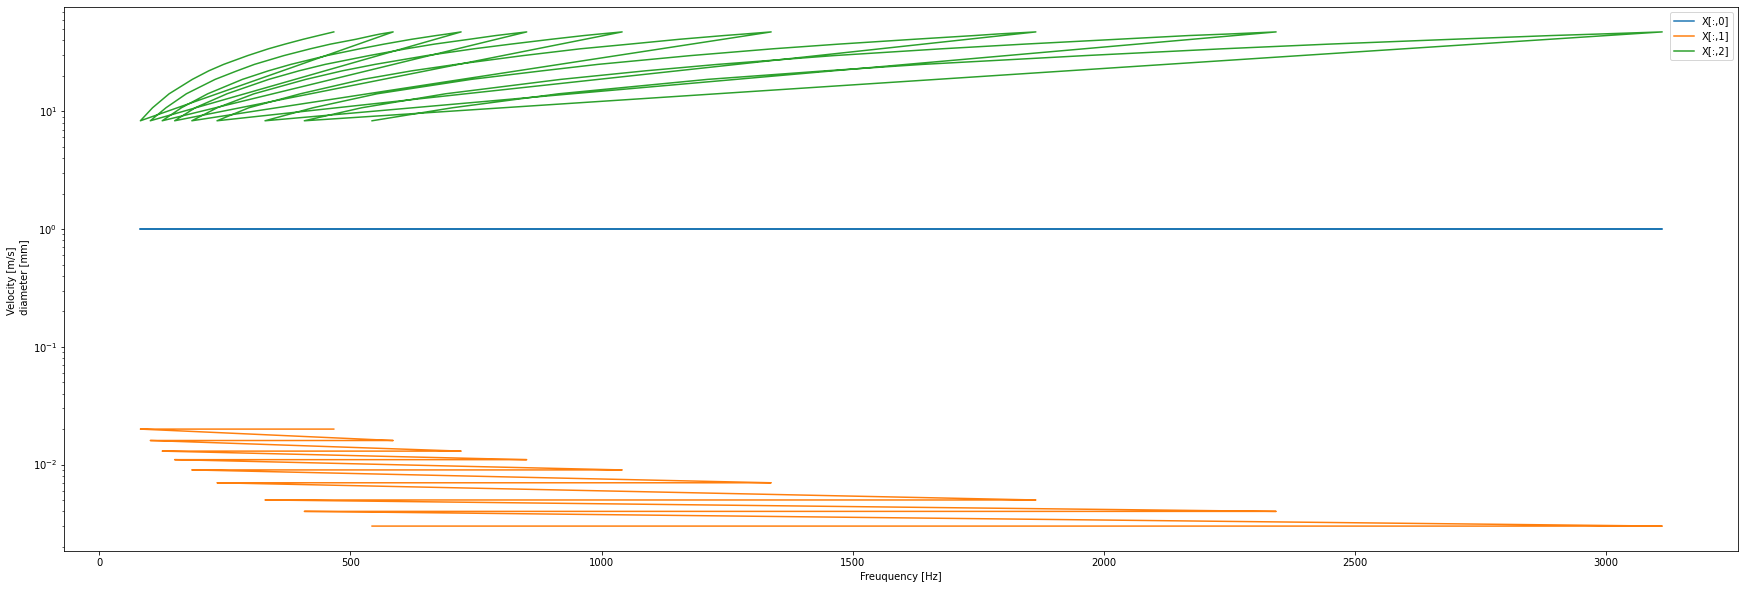

array([[1.000e+00, 3.000e-03, 8.320e+00],
       [1.000e+00, 3.000e-03, 1.073e+01],
       [1.000e+00, 3.000e-03, 1.410e+01],
       [1.000e+00, 3.000e-03, 1.869e+01],
       [1.000e+00, 3.000e-03, 2.210e+01],
       [1.000e+00, 3.000e-03, 2.506e+01],
       [1.000e+00, 3.000e-03, 2.976e+01],
       [1.000e+00, 3.000e-03, 3.400e+01],
       [1.000e+00, 3.000e-03, 3.725e+01],
       [1.000e+00, 3.000e-03, 4.095e+01],
       [1.000e+00, 3.000e-03, 4.407e+01],
       [1.000e+00, 3.000e-03, 4.542e+01],
       [1.000e+00, 3.000e-03, 4.731e+01],
       [1.000e+00, 4.000e-03, 8.320e+00],
       [1.000e+00, 4.000e-03, 1.073e+01],
       [1.000e+00, 4.000e-03, 1.410e+01],
       [1.000e+00, 4.000e-03, 1.869e+01],
       [1.000e+00, 4.000e-03, 2.210e+01],
       [1.000e+00, 4.000e-03, 2.506e+01],
       [1.000e+00, 4.000e-03, 2.976e+01],
       [1.000e+00, 4.000e-03, 3.400e+01],
       [1.000e+00, 4.000e-03, 3.725e+01],
       [1.000e+00, 4.000e-03, 4.095e+01],
       [1.000e+00, 4.000e-03, 4.40

In [118]:
# Hier eigenen Code schreiben ...
def fun_1 (f, d, v):
    f_tilde = f.flatten(order='F')
    x = list()
    # print(f_tilde)
    for d_ in d:
        for v_ in v:
            # x.append([1, d_*1000, v_]) # wir müssen d wieder in mm umwandeln, weil sonst sieht man nichts auf dem plot
            x.append([1, d_, v_])

    return np.array(x), f_tilde

X, f_tilde = fun_1(f, d, v)
print(f"Dimension von X: {X.ndim}")
print(f"Shape of X: {X.shape}")
print(f"Dimension of f_tilde: {f_tilde.ndim}")
print(f"Shape of f_tilde: {f_tilde.shape}")
# plot überprüfung
plt.figure(4, (30, 10))
plt.ylabel("Velocity [m/s] \n diameter [mm]")
plt.xlabel("Freuquency [Hz]")
plt.yscale("log")
for i in range(3):
    plt.plot(f_tilde, X[:,i])
plt.legend([ "X[:,0]", "X[:,1]", "X[:,2]"])

plt.show()
X

In [119]:
# Hier sind einige Plausibilitätstests:
assert X.shape[0]>100
assert X.shape[1] == 3  # (Gilt nur für das anfangs verwendete Modell)
assert len(f_tilde)==X.shape[0]

Angenommen, es existiert ein Modell für $f(d,v)$ mit bekannten Koeffizienten $\beta_j$, so kann dessen Güte anhand der Abweichungen von mit dem Modell berechneten zu den gemessenen Daten bewertet werden.
Diese Abweichungen werden häufig mithilfe der Summe der Fehlerquadrate (normiert mit der Anzahl der Messpunkte $N$) quantifiziert:

$$
\frac{1}{N}\sum_{i=1}^{N}(f(d_i,v_i) - \tilde{f}_i)^2 = \frac{1}{N}\| \pmb{f} - \pmb{\tilde{f}} \|_2^2
$$

Dieses Fehlermaß gilt es zu minimieren, um ein Modell möglichst genau an die Messdaten anzunähern.
Es wird daher auch als Kosten- oder Verlustfunktion bezeichnet.

**2.2) Schreiben Sie eine Funktion _loss()_, die die normierte Summe der Fehlerquadrate berechnet.**

  * Die Funktion soll als Parameter übergeben bekommen:
    * einen Koeffizienten-Vektor `beta`
    * eine Modell-Matrix `X`
    * einen Messwerte-Vektor `f_tilde`
  * Rückgabewert soll der berechnete Fehler sein.

In [120]:
def loss(beta, X, f_tilde):
    # Hier eigenen Code schreiben ...

    return (1/f_tilde.size) * (np.linalg.norm((sum((X * beta).T)) - f_tilde) ** 2)
    # return sum(sum(  ((X * beta) - f_tilde[:,np.newaxis])**2) ) / len(f_tilde)
    # return   sum((sum((X * beta).T) - f_tilde)**2) / len(f_tilde)

#Test
beta = np.array([1.,1.,1.])
X, f_tilde = fun_1(f,d,v)

print(loss(beta, X, f_tilde))
print(sum((sum((X * beta).T) - f_tilde)**2) / len(f_tilde))
print(X.shape, f_tilde[:, np.newaxis].shape)
# print(f_tilde[:,np.newaxis])
# print((X * beta) - f_tilde[:, np.newaxis])

sum((X*beta).T)

1113727.4759640854
1113727.4759640854
(117, 3) (117, 1)


array([ 9.323, 11.733, 15.103, 19.693, 23.103, 26.063, 30.763, 35.003,
       38.253, 41.953, 45.073, 46.423, 48.313,  9.324, 11.734, 15.104,
       19.694, 23.104, 26.064, 30.764, 35.004, 38.254, 41.954, 45.074,
       46.424, 48.314,  9.325, 11.735, 15.105, 19.695, 23.105, 26.065,
       30.765, 35.005, 38.255, 41.955, 45.075, 46.425, 48.315,  9.327,
       11.737, 15.107, 19.697, 23.107, 26.067, 30.767, 35.007, 38.257,
       41.957, 45.077, 46.427, 48.317,  9.329, 11.739, 15.109, 19.699,
       23.109, 26.069, 30.769, 35.009, 38.259, 41.959, 45.079, 46.429,
       48.319,  9.331, 11.741, 15.111, 19.701, 23.111, 26.071, 30.771,
       35.011, 38.261, 41.961, 45.081, 46.431, 48.321,  9.333, 11.743,
       15.113, 19.703, 23.113, 26.073, 30.773, 35.013, 38.263, 41.963,
       45.083, 46.433, 48.323,  9.336, 11.746, 15.116, 19.706, 23.116,
       26.076, 30.776, 35.016, 38.266, 41.966, 45.086, 46.436, 48.326,
        9.34 , 11.75 , 15.12 , 19.71 , 23.12 , 26.08 , 30.78 , 35.02 ,
      

In [121]:
# Hier ist ein Plausibilitätstest:
import numpy as np
assert np.isclose(loss(np.array([1., 1., 1.]), X, f_tilde), 1113727.4759640854)
# assert np.isclose(loss(np.array([1., 1., 1.]), X, f_tilde), 1102977.4759640854)  # dies würde gelten, wenn wir ohne SI Einheiten arbeiten

Mithilfe eines geeigneten Algorithmus' soll nun der Koeffizientensatz $\pmb{\beta}$ gefunden werden, der obige Kostenfunktion minimiert.
Praktischerweise sind im Modul [*scipy.optimize*](https://docs.scipy.org/doc/scipy/reference/optimize.html) bereits zahlreiche Minimierungsalgorithmen implementiert, die auf das Problem angewendet werden können.

Für den Fall der Mehrfachregression bietet sich die im Modul enthaltene Funktion [*minimize()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) an.
Wichtig sind hier vor allem die ersten drei Parameter, die ihr übergeben werden können:
  * `fun` : die Funktion, deren Ergebnis minimal werden soll (zu übergeben als Objekt _ohne_ Klammern)
  * `x0` : Startwerte für die zu ermittelnden Koeffizienten (als Array zu übergeben)
  * `args`: weitere Argumente, die die Funktion beim Aufruf erwartet (je nach Parameterliste, als Tupel übergeben)
  
Voraussetzung ist, dass die Argumente der Parameterliste der zu minimierenden Funktion in der Reihenfolge `(x, *args)` erwartet werden, also zunächst die  Koeffizienten, dann weitere Parameter. 
Dies sollte mit der Funktion *loss()* gegeben sein.

Die *minimize()*-Funktion gibt ein [OptimizeResult-Objekt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html) zurück.
Rufen wir die Funktion mit
```python
result = minimize(...)
```
auf, können z.B. folgende Eigenschaften abgerufen werden:
  * `result.x` : die gefundenen Koeffizienten
  * `result.success` : Boolean, der angibt, ob ein Minimum gefunden wurde
  * `result.nit` : Anzahl der vom Algorithmus durchgeführten Iterationen


**2.3) Finden Sie ein möglichst simples Modell, dass die Daten möglichst gut beschreibt.**

  * Kopieren Sie benötigten Quellcode aus Aufgabe 2.1) in die nächste Zelle, um das Modell schnell ändern zu können. Aufgabe 2.1) soll unverändert bleiben.
  * Minimieren Sie die Kostenfunktion. Wählen Sie als Startwert für jeden der Koeffizienten 1.
  * Suchen Sie Koeffizienten mindestens für folgende Modelle:
    *  $f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon$ 
    *  $f(d,v) = \beta_1\,d + \beta_2\,v + \beta_3\,\frac{1}{d^2} + \beta_4\,\frac{1}{v^2} + \epsilon$ 
    *  $f(d,v) = \beta_1\,\frac{v}{d}  + \beta_2\,\frac{v^3}{d^3} + \beta_3\,\frac{v^5}{d^5}  + \epsilon$
  * Geben Sie die Anzahl der Iterationen, den berechneten Koeffizientensatz und für diesen den Wert der Kostenfunktion aus. Geben Sie außerdem an, ob der Algorithmus das Minimum eindeutig gefunden hat.
  * Falls die Minimierung nicht erfolgreich/eindeutig war, versuchen Sie, das Modell zu ändern. Möglicherweise führt auch eine Vereinfachung zum Erfolg.
  * Plotten Sie jeweils das gemessene $\pmb{\tilde{f}}$ und das sich aus dem Modell ergebende $\pmb{f}$ in dasselbe Diagramm, um die Abweichung einschätzen zu können.
  
<!-- *  f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \beta_3\,\frac{d}{v}  + \beta_4\,\frac{v}{d}  + \epsilon -->

In [122]:
# Hierhin den relevanten Code aus Aufgabe 2.1) kopieren ...

# funktion 1 einfach nur weil warum nicht. Wird dann halt überschrieben, aber dafür haben wir alle hier drin
def fun_1(f, d, v):
    f_tilde = f.flatten(order='F')
    x = list()
    # print(f_tilde)
    for d_ in d:
        for v_ in v:
            # wir müssen d wieder in mm umwandeln, weil sonst sieht man nichts auf dem plot
            x.append([1, d_, v_])

    return np.array(x), f_tilde


def fun_2 (f, d, v):
    f_tilde = f.flatten(order='F')
    x = list()
    for d_ in d:
        for v_ in v:
           
            x.append([d_, v_, 1/d_**2, 1/v_**2 ])
    
    return np.array(x), f_tilde


def fun_3(f, d, v):
    f_tilde = f.flatten(order='F')
    x = list()
    for d_ in d:
        for v_ in v:

            x.append([v_/d_, (v_**3)/((d_)**3), (v_**5)/((d_)**5)])
    return np.array(x), f_tilde


def fun_4 (data, d):
    X = []
    f_tilde = data.T[1:].T.flatten(order='F')
    for i in range(0,data.shape[1]-1):
        for j in range(0,data.shape[0]):
            X += [[data[j,0]/d[i],  data[j,0]**3/(d[i]**3),   data[j,0]**5/(d[i]**5)]]
    return np.array(X),np.array(f_tilde)

In [123]:
# df.to_numpy()

In [124]:
from scipy.optimize import minimize
# Hier eigenen Code schreiben ...


result = [
    minimize(loss, np.array([1,1,1]), fun_1(f,d,v)),
    minimize(loss, np.array([1,1,1,1]), fun_2(f,d,v)),
    minimize(loss, np.array([1,1,1]), fun_3(f,d,v)),
    minimize(loss, np.array([1,1,1]), fun_4(df.to_numpy(), d*1000) )
]

out = [f"x: {r_.x}, fun: {r_.fun}, success: {r_.success}, nit: {r_.nit}" for r_ in result]
for out_ in out:
    print( out_)

# Funktion 2 und 3 sind nicht erfolgreich

r = result


x: [ 8.16018720e+02 -8.37155964e+04  2.89849751e+01], fun: 117576.1539346416, success: True, nit: 24
x: [-3.05972230e+04  2.82288565e+01  1.10072462e-02 -2.15103658e+03], fun: 56913.887245312726, success: False, nit: 23
x: [ 1.00000037e+00 -1.00096731e+06  4.73902410e-03], fun: 4.198245907146298e+34, success: False, nit: 3
x: [ 1.97287035e+02  2.36615565e-03 -1.00159745e-05], fun: 14.21215437673687, success: False, nit: 10


(4, 117)


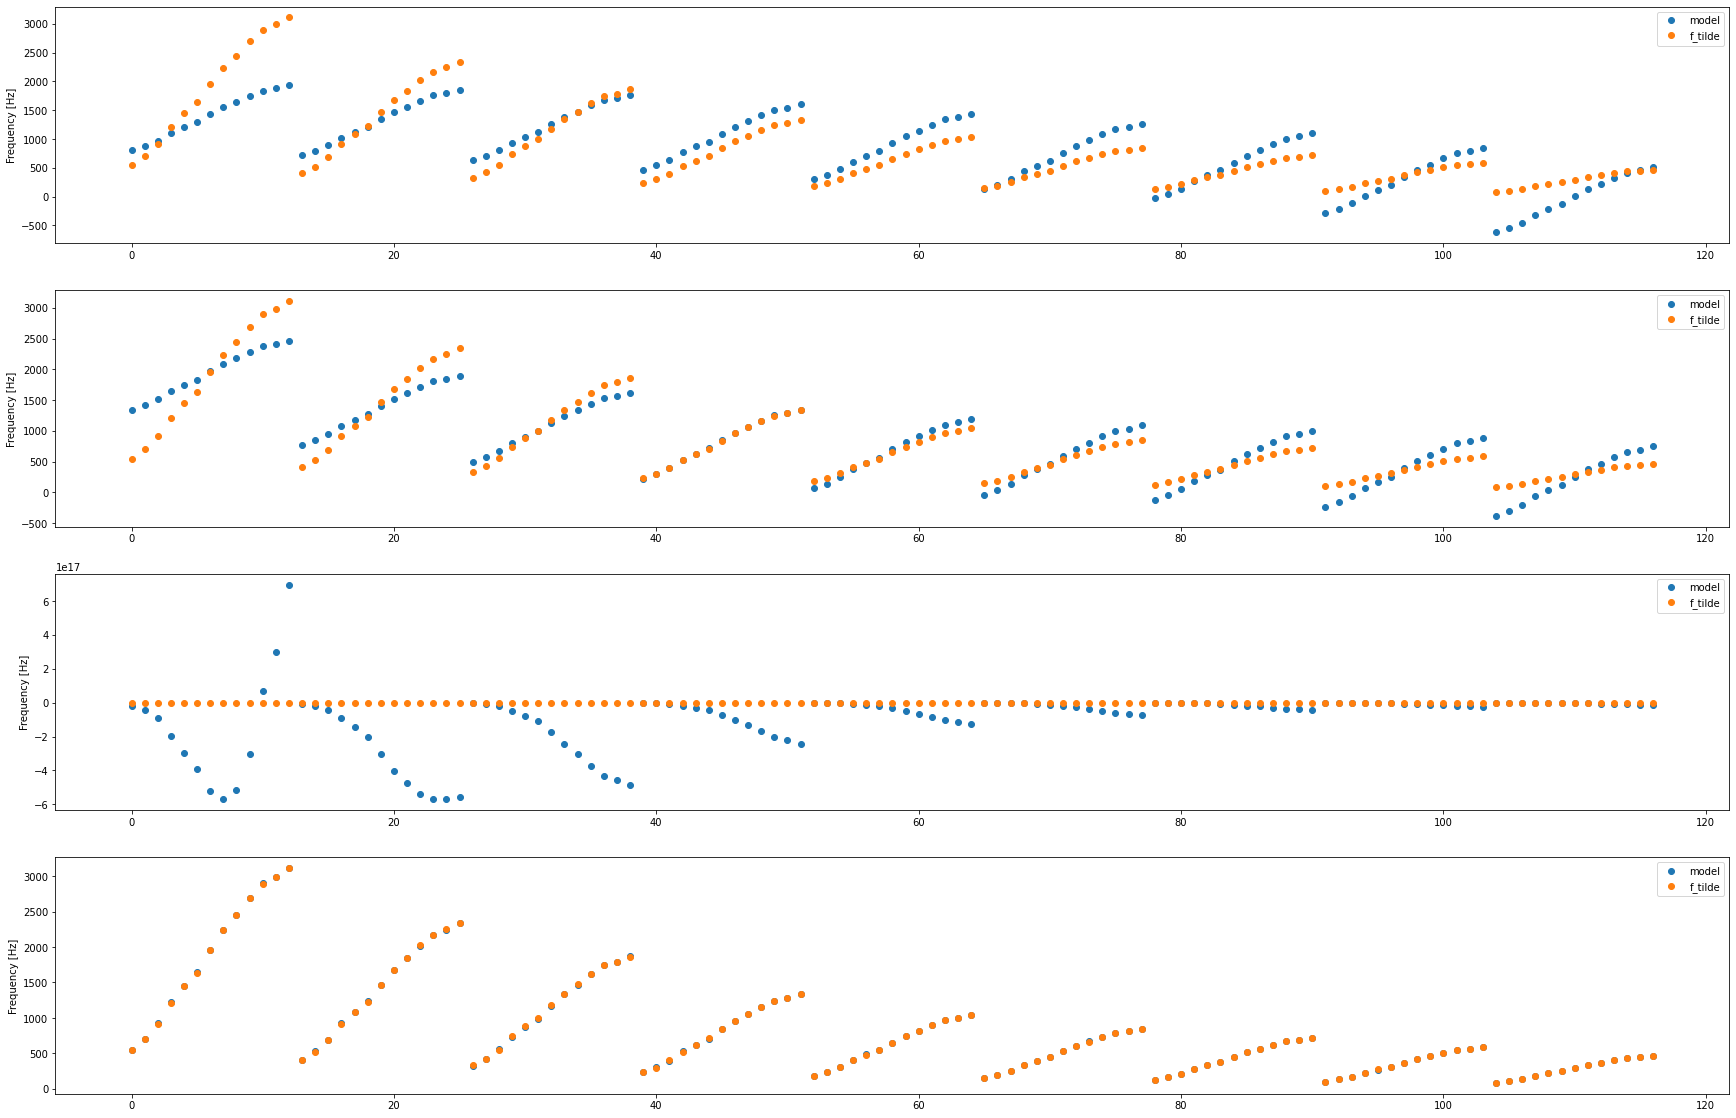

In [125]:
# plotten:
x_1 = fun_1(f,d,v)[0]
x_2 = fun_2(f,d,v)[0]
x_3, f_tilde = fun_3(f,d,v)

x_4 = fun_4(df.to_numpy(), d*1000)[0] # diese ist nicht in SI Einheiten



f_model = np.array(
    [
        x_1 @ r[0].x,  
        x_2 @ r[1].x, 
        x_3 @ r[2].x, 
        x_4 @ r[3].x
    ] 
) # Matrixmultiplikation

print(f_model.shape)
# f_model


plt.figure(5, (30,20))
x_ax = np.arange(f_model.shape[1])

for i, model in enumerate(f_model):
    plt.subplot(f_model.shape[0],1,i+1)
    plt.plot(x_ax, f_model[i], linestyle='none', marker='o')
    plt.plot(x_ax, f_tilde, linestyle='none', marker='o')
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("")
    plt.legend(["model","f_tilde"])
    # plt.yscale("log")





### 3) Vorhersage

**Wenden Sie das Modell an.**

  * Wie hoch ist die Hiebton-Frequenz bei einem Zylinderdurchmesser von 10 mm und einer Strömungsgeschwindigkeit von 20 m/s?
  * Wie groß ist der Durchmesser eines Zylinders, der bei 42 m/s Windgeschwindigkeit mit 1000 Hz pfeift?
  * Wie groß ist die Strömungsgeschwindigkeit, wenn ein Zylinder mit 30 mm Durchmesser einen Ton bei 300 Hz verursacht?

In [126]:
r[3].x[0]

197.28703520044567

In [127]:
# Hier eigenen Code schreiben ...
print(f"Hiebton-Frequenz bei einem Zylinderdurchmesser von 10mm und Strömungsgeschwindigkeit von 20 m/s:\n\n\t {r[3].x[0]*20/10} [Hz]\n\n")
print(f"Durchmesser des Zylinders bei 42 [m/s] Windgeschwindigkeit und 1000 [Hz]:\n\n\t {r[3].x[0]*42/1000} [mm]\n\n")
print(f"Strömungsgeschwindigkeit mit Durchmesser von 30mm und Ton von 300Hz:\n\n\t {300*30 / r[3].x[0]} [m/s]")

"""Disclaimer: Ich bekomme keine richtigen Daten, wenn ich meinen Durchmesser in SI-Einheiten umrechen, also in Meter. Woran das liegt weiß ich leider nicht..."""

Hiebton-Frequenz bei einem Zylinderdurchmesser von 10mm und Strömungsgeschwindigkeit von 20 m/s:

	 394.57407040089134 [Hz]


Durchmesser des Zylinders bei 42 [m/s] Windgeschwindigkeit und 1000 [Hz]:

	 8.286055478418719 [mm]


Strömungsgeschwindigkeit mit Durchmesser von 30mm und Ton von 300Hz:

	 45.61881114415809 [m/s]


'Disclaimer: Ich bekomme keine richtigen Daten, wenn ich meinen Durchmesser in SI-Einheiten umrechen, also in Meter. Woran das liegt weiß ich leider nicht...'